## Liveness Detection

Nowadays, **Spoofing** is the main issue. Spoofing is cybersecurity issue when we try to make false data in use. **Spoofing of human image** can lead to major issues like lossing important and sensitive data. To handle this issue, we can use concept of **Liveness Detection**.

Today i tried to implement the same using the NUAA imposter dataset. The dataset had around 5105 real images and 7535 fake images.
 

The project has few steps, in this project i tried to use the basic cnn model for predicting the real images or Liveness of images.

Reference of papers/Blogs:-


1.   Anti spoofing  [Link of paper](https://link.springer.com/referenceworkentry/10.1007%2F978-3-642-27733-7_9067-2)
2.   Real-time face liveness detection [Link for blog](https://towardsdatascience.com/real-time-face-liveness-detection-with-python-keras-and-opencv-c35dc70dafd3)

Here Images are ROI face detected Images. So our only assumption here is we are getting ROI Face detected images. One can get the ROI based face detection by using OpenCV's library.

Step 1:- Importing Libraries and initializing basic varibales for training. Also we are going to decalre variables to store the link for the images dataset.

In [7]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K


INIT_LR = 1e-4
BS = 8
EPOCHS = 50

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#for dataset links
r_link = "/content/drive/MyDrive/Liveness-Detection/real"
f_link = "/content/drive/MyDrive/Liveness-Detection/fake"

In [10]:
#storing the file names in a list so that we can access them easily
real = os.listdir(r_link)
fake = os.listdir(f_link)

In [11]:
print("Number of Real Faces " + str(len(real)) + "\nNumber of Fake or Spoofed Faces " + str(len(fake)))

Number of Real Faces 5105
Number of Fake or Spoofed Faces 7535


Step 2:- Resizing all the Images in size of 100 x 100 to have common size for training of the Images. Both Fake and real images were resized.


In [12]:
data = [] #for storing image pixels
label = [] #for storing image type i.e. is image fake or real for fake we are assigning 1 and for real we are assigning 0
c = 0
#for real images
for image in real:
  img = cv2.imread(r_link + '/' +image)
  img = cv2.resize(img,(100,100))
  c = c+1
  data.append(img)
  label.append(0)

In [13]:
#for fake images
c = 0
for image in fake:
  img = cv2.imread(f_link + '/' +image)
  img = cv2.resize(img,(100,100))
  c = c+1
  data.append(img)
  label.append(1)

In [14]:
print("Image Shape = " + str(data[0].shape) +"\nTotal Number of images = " + str(len(data)))

Image Shape = (100, 100, 3)
Total Number of images = 12640


Step 3:- Scaling the data by using Concept of Min-Max Scaling.
Formula for Min-Max Scaling is 
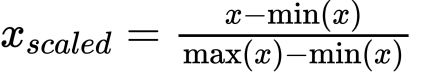

For our case we have max value as 255 and min value as 0 So the final formula will be x/255

In [15]:
data = np.array(data, dtype="float") / 255.0
label = np.array(label,dtype="int")

Step 4:- Spliting data Data has to be splitted in the format as 75:25 i.e. 75% training image and 25% testing images. Also i am deleting some variables so that i can free some RAM.

In [16]:
(trainX, testX, trainY, testY) = train_test_split(data, label,
	test_size=0.25, random_state=42)

In [17]:
del data

In [18]:
del label

In [19]:
del real
del fake
del c

Step 5:- Using of Data Generator Image Data Generator or Data augmentation is concept used to tackle overfitting scenario. It generates images with the transformations written in the brackets. In our case we are doing rotation of image at 20 degree, zooming 15%, shifting in width and height with 20%, shearing and flipping of image.

In [20]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

Step 6:- Creating Model and declaring Optimizer. Optimizer plays a very vital role for deep learning model training. Optimizer optimizes or decreases the error to reach the global optima in very less time.

Model is created using CNN Sequential model

In [21]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [22]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding="same",input_shape=(100, 100, 1)))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 16)      2320      
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0

Step 7:- Training of model We are going to use Cross entropy or log loss as loss function for our training. Also we are going to use concept of storing best model, so that even if we have any network or system issues we can continue the training afterwards. We are going to train our model upto 50 epochs and batch size of 8 images at a time.


In [24]:
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [25]:
checkpoint_filepath = '/content/drive/MyDrive/Liveness-Detection/best_model.h5'
model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [26]:
valY = testY[3000:]
testY = testY[:3000]
valX = testX[3000:]
testX = testX[:3000]

In [27]:
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS,callbacks=[model_checkpoint_callback])

Epoch 1/50
1185/1185 [==============================] - 223s 186ms/step - loss: 0.5011 - accuracy: 0.7938 - val_loss: 0.4201 - val_accuracy: 0.8560
Epoch 2/50
1185/1185 [==============================] - 221s 186ms/step - loss: 0.3818 - accuracy: 0.8443 - val_loss: 0.7301 - val_accuracy: 0.7747
Epoch 3/50
1185/1185 [==============================] - 220s 186ms/step - loss: 0.3214 - accuracy: 0.8753 - val_loss: 0.9987 - val_accuracy: 0.8737
Epoch 4/50
1185/1185 [==============================] - 219s 185ms/step - loss: 0.3126 - accuracy: 0.8744 - val_loss: 3.7926 - val_accuracy: 0.6303
Epoch 5/50
1185/1185 [==============================] - 221s 186ms/step - loss: 0.3000 - accuracy: 0.8765 - val_loss: 0.6613 - val_accuracy: 0.9033
Epoch 6/50
1185/1185 [==============================] - 221s 187ms/step - loss: 0.2505 - accuracy: 0.9042 - val_loss: 0.5526 - val_accuracy: 0.9057
Epoch 7/50
1185/1185 [==============================] - 221s 187ms/step - loss: 0.2206 - accuracy: 0.9148 - val_

Step 8:- Analyzing the model with help of classification report and viewing the training history of our model.

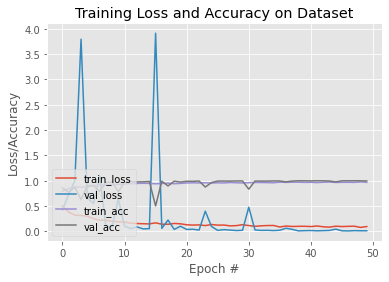

In [28]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [29]:
predictions = model.predict(x=valX, batch_size=BS)
ans = []
for i in predictions:
  if i>=0.5:
    ans.append(1)
  else:
    ans.append(0)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(valY,ans))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        87

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



**Conclusion:-** Model accuracy was exceptional and model worked well on test images as well. 

**Restriction:-** Due to lack of variety in images, model doesn't work well on Non East Asian Images. So for handling this issue, we can create a big dataset for the future projects on the Same topic.